In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests 
from datetime import datetime
from citipy import citipy
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c283a4a93dd65361dfb496245ffc9e04


In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        continue

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nishihara
Processing Record 2 of Set 1 | provideniya
Processing Record 3 of Set 1 | bonoua
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | sao jose da coroa grande
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | camacha
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | daultala
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | emba
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | muskegon
Processing Record 19 of Set 1 | lensk
Processing Record 20 of Set 1 | coquimbo
Processing Record 21 of Set 1 | ternate
Processing Record 22 of Set 1 | lander
Processing Re

Processing Record 39 of Set 4 | peniche
Processing Record 40 of Set 4 | komsomolskiy
Processing Record 41 of Set 4 | olinda
Processing Record 42 of Set 4 | nouadhibou
Processing Record 43 of Set 4 | berdigestyakh
Processing Record 44 of Set 4 | jumla
Processing Record 45 of Set 4 | ixtapa
Processing Record 46 of Set 4 | mar del plata
Processing Record 47 of Set 4 | kaitangata
Processing Record 48 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 49 of Set 4 | lata
Processing Record 50 of Set 4 | saint-philippe
Processing Record 1 of Set 5 | mikhaylovka
Processing Record 2 of Set 5 | nanortalik
Processing Record 3 of Set 5 | mount gambier
Processing Record 4 of Set 5 | skibotn
Processing Record 5 of Set 5 | chokurdakh
Processing Record 6 of Set 5 | aklavik
Processing Record 7 of Set 5 | saldanha
Processing Record 8 of Set 5 | paraiso
Processing Record 9 of Set 5 | borlange
City not found. Skipping...
Processing Record 10 of Set 5 | torbay
Processing Record 11 of Set 

Processing Record 25 of Set 8 | save
Processing Record 26 of Set 8 | nushki
Processing Record 27 of Set 8 | san antonio
Processing Record 28 of Set 8 | sobolevo
Processing Record 29 of Set 8 | salvador
Processing Record 30 of Set 8 | guangshui
Processing Record 31 of Set 8 | tual
Processing Record 32 of Set 8 | miraflores
Processing Record 33 of Set 8 | monrovia
Processing Record 34 of Set 8 | necochea
Processing Record 35 of Set 8 | maniitsoq
Processing Record 36 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 37 of Set 8 | kalabo
Processing Record 38 of Set 8 | benghazi
Processing Record 39 of Set 8 | poronaysk
Processing Record 40 of Set 8 | san andres
Processing Record 41 of Set 8 | nizhniy baskunchak
Processing Record 42 of Set 8 | kuusamo
Processing Record 43 of Set 8 | karratha
Processing Record 44 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 45 of Set 8 | pentecoste
Processing Record 46 of Set 8 | tidore
City not found. Skipping...
Pro

Processing Record 11 of Set 12 | tecolutla
Processing Record 12 of Set 12 | paita
Processing Record 13 of Set 12 | scarborough
Processing Record 14 of Set 12 | roma
Processing Record 15 of Set 12 | oktyabrskoye
Processing Record 16 of Set 12 | yuncheng
Processing Record 17 of Set 12 | waipawa
Processing Record 18 of Set 12 | panguna
Processing Record 19 of Set 12 | san cristobal
Processing Record 20 of Set 12 | nerja
Processing Record 21 of Set 12 | pauini
Processing Record 22 of Set 12 | gerash
Processing Record 23 of Set 12 | amurzet
Processing Record 24 of Set 12 | road town
Processing Record 25 of Set 12 | mayenne
Processing Record 26 of Set 12 | naze
Processing Record 27 of Set 12 | disna
Processing Record 28 of Set 12 | lincoln
Processing Record 29 of Set 12 | parfino
Processing Record 30 of Set 12 | pavlodar
Processing Record 31 of Set 12 | xam nua
Processing Record 32 of Set 12 | catamarca
Processing Record 33 of Set 12 | arman
Processing Record 34 of Set 12 | shatsk
Processing

In [7]:
len(city_data)

570

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nishihara,26.1842,127.7558,85.68,78,75,13.27,JP,2021-05-23 05:22:32
1,Provideniya,64.3833,-173.3000,37.20,75,91,4.52,RU,2021-05-23 05:22:33
2,Bonoua,5.2741,-3.5950,78.42,88,100,2.33,CI,2021-05-23 05:22:33
3,Ushuaia,-54.8000,-68.3000,35.26,93,90,1.14,AR,2021-05-23 05:22:34
4,Sao Jose Da Coroa Grande,-8.8978,-35.1478,78.40,63,65,6.44,BR,2021-05-23 05:22:34
5,Albany,42.6001,-73.9662,70.81,60,37,1.01,US,2021-05-23 05:22:34
6,Camacha,33.0833,-16.3333,60.53,63,40,12.66,PT,2021-05-23 05:22:35
7,Hermanus,-34.4187,19.2345,59.90,50,32,7.65,ZA,2021-05-23 05:22:35
8,Punta Arenas,-53.1500,-70.9167,37.51,89,90,6.02,CL,2021-05-23 05:22:36
9,Ribeira Grande,38.5167,-28.7000,58.57,62,14,4.63,PT,2021-05-23 05:22:36


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nishihara,JP,2021-05-23 05:22:32,26.1842,127.7558,85.68,78,75,13.27
1,Provideniya,RU,2021-05-23 05:22:33,64.3833,-173.3000,37.20,75,91,4.52
2,Bonoua,CI,2021-05-23 05:22:33,5.2741,-3.5950,78.42,88,100,2.33
3,Ushuaia,AR,2021-05-23 05:22:34,-54.8000,-68.3000,35.26,93,90,1.14
4,Sao Jose Da Coroa Grande,BR,2021-05-23 05:22:34,-8.8978,-35.1478,78.40,63,65,6.44


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

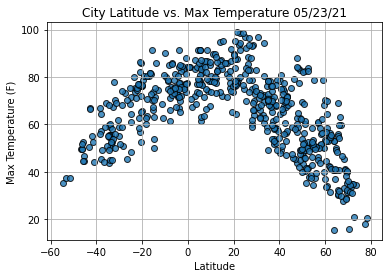

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

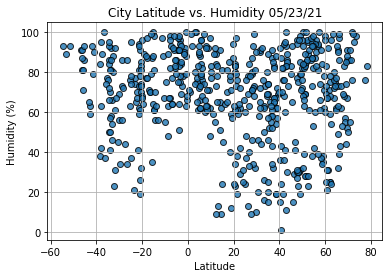

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

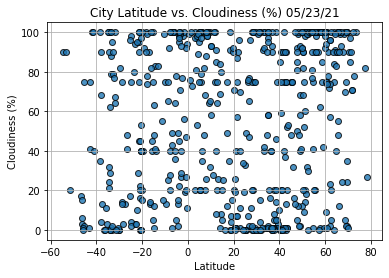

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

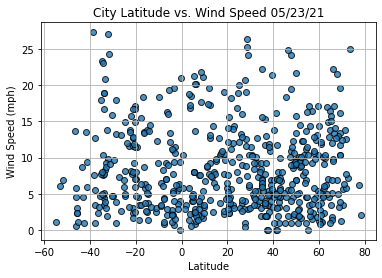

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
index13 = city_data_df.loc[13]
index13

City                        Vaini
Country                        TO
Date          2021-05-23 05:22:38
Lat                         -21.2
Lng                        -175.2
Max Temp                    77.16
Humidity                       94
Cloudiness                     75
Wind Speed                    2.3
Name: 13, dtype: object

In [19]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nishihara,JP,2021-05-23 05:22:32,26.1842,127.7558,85.68,78,75,13.27
1,Provideniya,RU,2021-05-23 05:22:33,64.3833,-173.3000,37.20,75,91,4.52
2,Bonoua,CI,2021-05-23 05:22:33,5.2741,-3.5950,78.42,88,100,2.33
5,Albany,US,2021-05-23 05:22:34,42.6001,-73.9662,70.81,60,37,1.01
6,Camacha,PT,2021-05-23 05:22:35,33.0833,-16.3333,60.53,63,40,12.66


In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

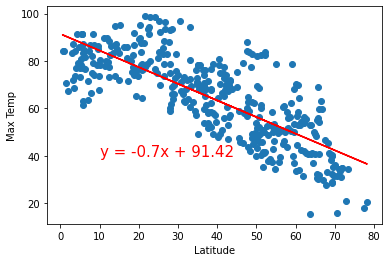

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

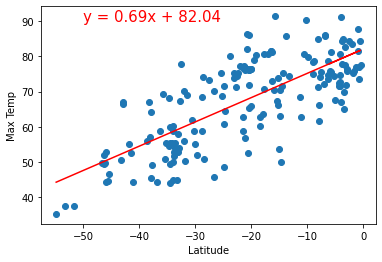

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

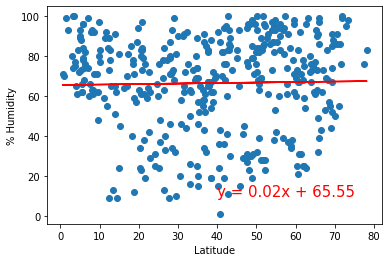

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

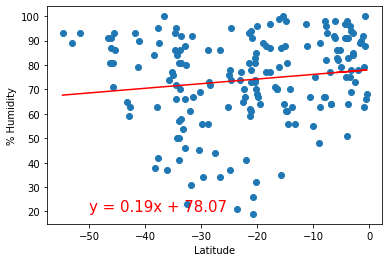

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,20))

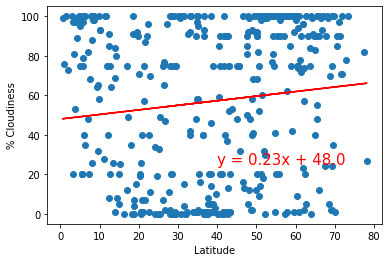

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,25))

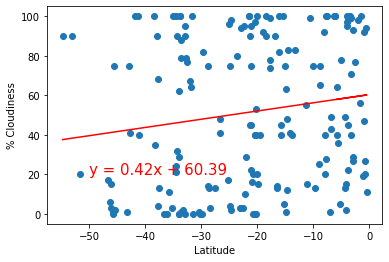

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,20))

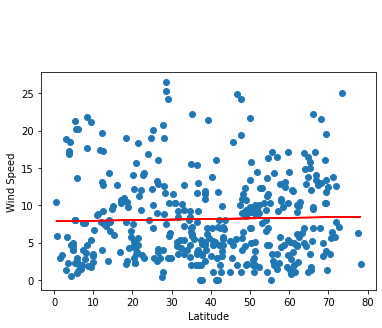

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

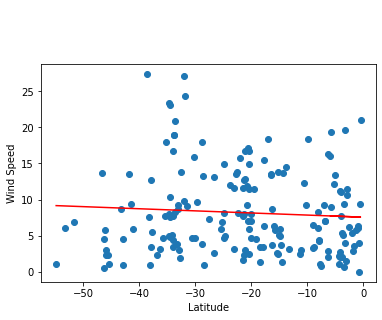

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere / for Wind Speed', 'Wind Speed',(-50,35))